## Task 1. Graphs.

In [2]:
import numpy as np
from math import *

In [3]:
# для того чтобы все атрибуты были одним списком -- при чтении транспонируем
# year, hare, lynx, carrot 
data = np.loadtxt('http://www.scipy-lectures.org/_downloads/populations.txt').transpose()
data

array([[ 1900.,  1901.,  1902.,  1903.,  1904.,  1905.,  1906.,  1907.,
         1908.,  1909.,  1910.,  1911.,  1912.,  1913.,  1914.,  1915.,
         1916.,  1917.,  1918.,  1919.,  1920.],
       [30000., 47200., 70200., 77400., 36300., 20600., 18100., 21400.,
        22000., 25400., 27100., 40300., 57000., 76600., 52300., 19500.,
        11200.,  7600., 14600., 16200., 24700.],
       [ 4000.,  6100.,  9800., 35200., 59400., 41700., 19000., 13000.,
         8300.,  9100.,  7400.,  8000., 12300., 19500., 45700., 51100.,
        29700., 15800.,  9700., 10100.,  8600.],
       [48300., 48200., 41500., 38200., 40600., 39800., 38600., 42300.,
        44500., 42100., 46000., 46800., 43800., 40900., 39400., 39000.,
        36700., 41800., 43300., 41300., 47300.]])

In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import rcParams
import pandas as pd

### Raw graph

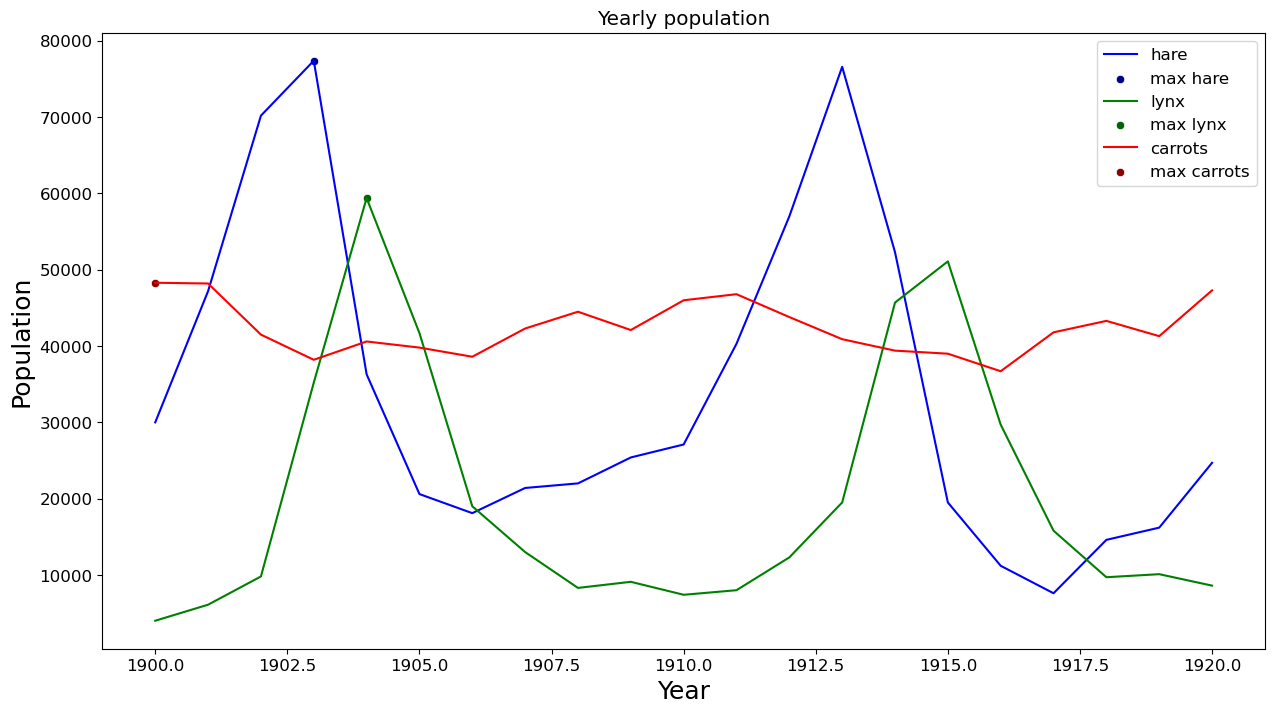

In [24]:
plt.figure(figsize=(15, 8))
plt.rcParams['font.size'] = '12'
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Population', fontsize = 18, rotation = 90)

d = {1: 'hare', 2: 'lynx', 3 : 'carrots'}
colors = dict(zip([i for i in range(1, 4)], ['b', 'g', 'r']))
colors_max = dict(zip([i for i in range(1, 4)], ['darkblue', 'darkgreen', 'darkred']))

for i in range(1, 4):
    plt.xticks = data[0]
    max_population = {data[0][list(data[i]).index(max(data[i]))] : max(data[i])}
    graph_data = dict(zip(data[0], data[i]))
    line = sb.lineplot(data = graph_data, label = d[i], color=colors[i])
    line.set(title='Yearly population')
    line.xticks = data[0]
    #max_pops = sb.scatterplot(data = max_population, color = colors_max[i], sizes = 100, legend = 'brief')
    
    max_pops = sb.scatterplot(data = max_population, label = f'max {d[i]}', color = colors_max[i], sizes = 80, legend = 'brief')
    # line.set_xticklabels(labels = data[0], rotation = 45)
plt.legend()
plt.show()

### Stacked bar graph

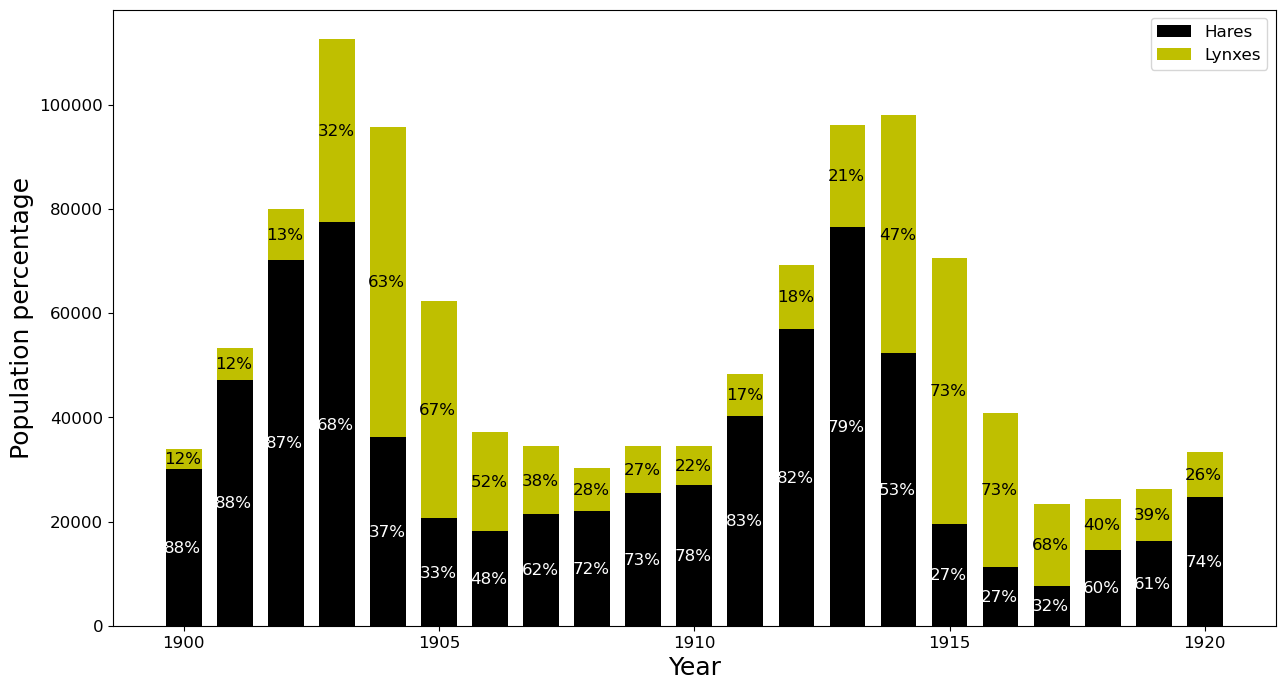

In [23]:
plt.figure(figsize = (15, 8))
plt.rcParams['font.size'] = '12'
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Population percentage', rotation = 90, fontsize = 18)

stack_dict = {data[0][i] : [floor((data[1][i]/(data[1][i] + data[2][i])) * 100)/100, (ceil(data[2][i]/(data[1][i] + data[2][i])*100))/100] for i in range(len(data[0]))}
for i in range(len(data[0])):
    plt.bar(data[0], data[1], color = 'k', width = 0.7)
    plt.text(data[0][i]-0.385, data[1][i]/2 - 1000, f'{int(stack_dict[data[0][i]][0]*100)}%',color = 'white')
    plt.bar(data[0], data[2], bottom = data[1], color = 'y', width = 0.7)
    plt.text(data[0][i]-0.385, data[1][i] + data[2][i]/2 - 1000, f'{int(stack_dict[data[0][i]][1]*100)}%', color = 'black')
plt.legend(['Hares', 'Lynxes'])
plt.show()


### Histogram of population + mean and std

#### Hares

[]

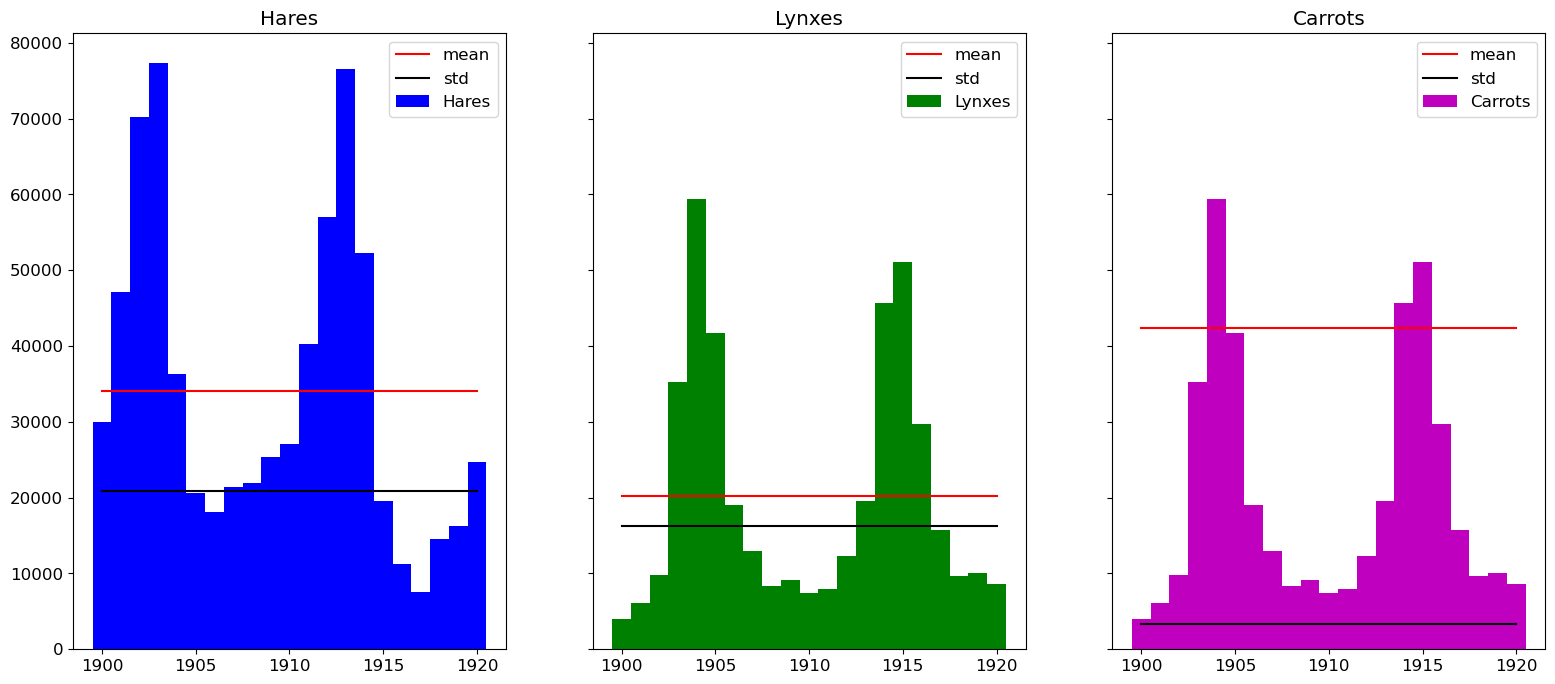

In [32]:
mean_h = np.mean(data[1])
std_h = np.std(data[1])
mean_l = np.mean(data[2])
std_l = np.std(data[2])
mean_c = np.mean(data[3])
std_c = np.std(data[3])

fig, (ax1, ax2, ax3)  = plt.subplots(1, 3, figsize = (19, 8), sharey='row')

ax1.bar(data[0], data[1], label = 'Hares', width = 1, color = 'b')
ax1.plot(data[0], [mean_h for i in range(len(data[0]))], label = 'mean', color = 'r')
ax1.plot(data[0], [std_h for i in range(len(data[0]))], label = 'std', color = 'k')
ax1.set_title('Hares')

ax2.bar(data[0], data[2], label = 'Lynxes', width = 1, color = 'g')
ax2.plot(data[0], [mean_l for i in range(len(data[0]))], label = 'mean', color = 'r')
ax2.plot(data[0], [std_l for i in range(len(data[0]))], label = 'std', color = 'k')
ax2.set_title('Lynxes')

ax3.bar(data[0], data[2], label = 'Carrots', width = 1, color = 'm')
ax3.plot(data[0], [mean_c for i in range(len(data[0]))], label = 'mean', color = 'r')
ax3.plot(data[0], [std_c for i in range(len(data[0]))], label = 'std', color = 'k')
ax3.set_title('Carrots')

ax1.legend()
ax1.plot()
ax2.legend()
ax2.plot()
ax3.legend()
ax3.plot()

### Pie chart

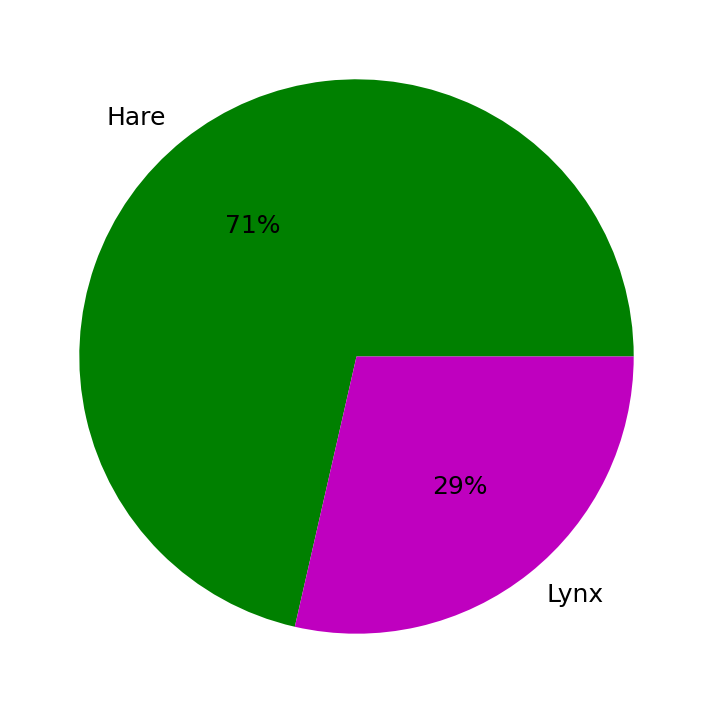

In [34]:
hl = ['H' if data[1][i] > data[2][i] else 'L' for i in range(len(data[0]))]
hl_percentage = {'Hare' : hl.count('H'), 'Lynx' : hl.count('L')}
plt.figure(figsize=(9, 9))
plt.rcParams['font.size'] = '18'

fig = plt.pie(x = hl_percentage.values(), labels = hl_percentage.keys(), colors = ['g', 'm'], autopct='%.0f%%', textprops = {'color' : 'k'})
plt.show()

### Correlation heatmap

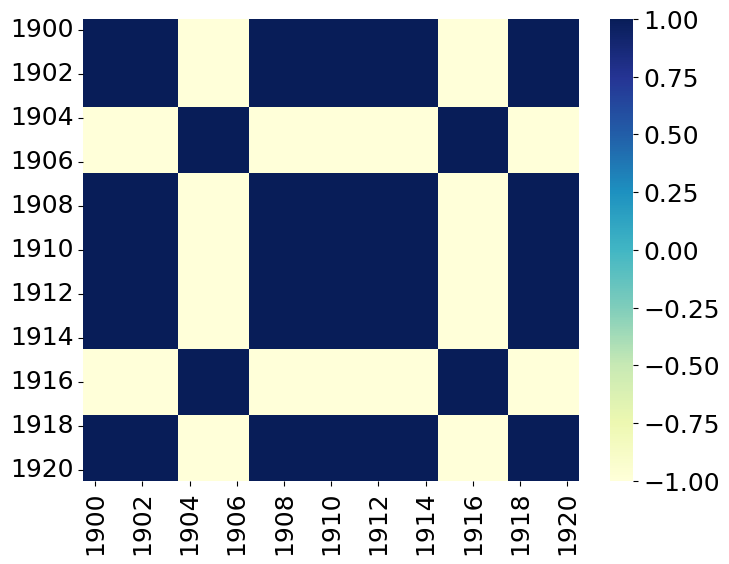

In [35]:
data_df = pd.DataFrame(data[1:3], columns = list(map(lambda x: int(x), data[0])))
data_df

plt.figure(figsize = (8, 6))
sb.heatmap(data_df.corr(), cmap = 'YlGnBu')
plt.show()

### Scatter plot

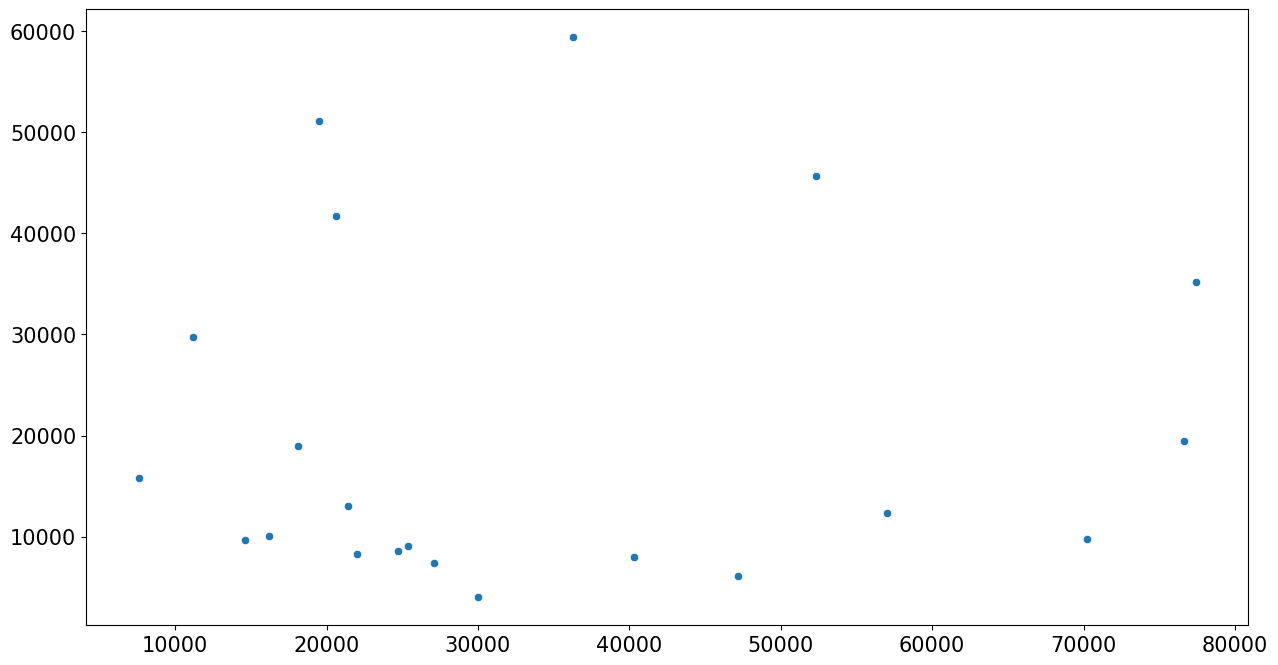

In [43]:
plt.figure(figsize = (15, 8))
plt.rcParams['font.size'] = '15'

df = pd.DataFrame

kr = sb.scatterplot(x = data[1], y = data[2])

plt.show()